In [33]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [34]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
x = X.values  
y = y.values 
# scaler = preprocessing.StandardScaler()
# x_scaled = scaler.fit_transform(x)

train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.15)
#train_X,val_X,train_y,val_y = train_test_split(train_X, train_y, random_state=0, test_size=0.2)

(3918, 13)


In [35]:
K_accuracy = dict()

In [36]:
t_list = list()
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X,train_y)
    #predicted= model.predict(val_X)
    tpredicted= model.predict(train_X)
    val_accuracy = cross_val_score(model, train_X,train_y, cv=3).mean()
    t_accuracy = np.sum(tpredicted == train_y) / train_y.shape[0]
    t_list.append(t_accuracy)
    K_accuracy[k] = val_accuracy

k =  1  accuracy =  0.518611648944
k =  2  accuracy =  0.460972997487
k =  3  accuracy =  0.438138443994
k =  4  accuracy =  0.443530619902
k =  5  accuracy =  0.450751653805
k =  6  accuracy =  0.450746787455
k =  7  accuracy =  0.44925908775
k =  8  accuracy =  0.440856339489
k =  9  accuracy =  0.435439542521
k =  10  accuracy =  0.441747231546
k =  11  accuracy =  0.431243449207
k =  12  accuracy =  0.431826982488
k =  13  accuracy =  0.428832628052
k =  14  accuracy =  0.442332104133
k =  15  accuracy =  0.435722491553
k =  16  accuracy =  0.446236845273
k =  17  accuracy =  0.436030924699
k =  18  accuracy =  0.436329595897
k =  19  accuracy =  0.445035641142
k =  20  accuracy =  0.440842790436
k =  21  accuracy =  0.449234977065
k =  22  accuracy =  0.454347956924
k =  23  accuracy =  0.450744614342
k =  24  accuracy =  0.454352563212
k =  25  accuracy =  0.450141027292
k =  26  accuracy =  0.451343310668
k =  27  accuracy =  0.447139084022
k =  28  accuracy =  0.445632973788
k 

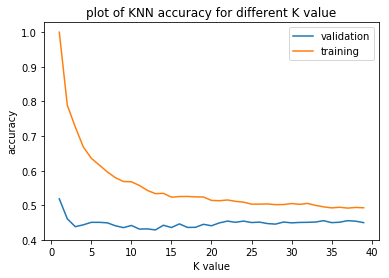

In [37]:
for k,v in K_accuracy.items():
    print("k = ",k," accuracy = ",v)

plt.plot(range(1,40),K_accuracy.values(),label="validation")
plt.plot(range(1,40),t_list,label="training")
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.title('plot of KNN accuracy for different K value')
plt.legend()
plt.savefig("KNN_wine_1.jpg")
plt.show()

In [38]:
sorted_K_accuracy = sorted(K_accuracy.items(), key=lambda kv: kv[1],reverse=True)
for k,v in sorted_K_accuracy:
    print("k = ",k," accuracy = ",v)


k =  1  accuracy =  0.518611648944
k =  2  accuracy =  0.460972997487
k =  34  accuracy =  0.455567301773
k =  37  accuracy =  0.455559987624
k =  24  accuracy =  0.454352563212
k =  22  accuracy =  0.454347956924
k =  38  accuracy =  0.454058213868
k =  33  accuracy =  0.451656619913
k =  29  accuracy =  0.451640088313
k =  26  accuracy =  0.451343310668
k =  36  accuracy =  0.451058718396
k =  5  accuracy =  0.450751653805
k =  32  accuracy =  0.450750285251
k =  6  accuracy =  0.450746787455
k =  23  accuracy =  0.450744614342
k =  31  accuracy =  0.45043833481
k =  25  accuracy =  0.450141027292
k =  35  accuracy =  0.449852098544
k =  39  accuracy =  0.449851823858
k =  7  accuracy =  0.44925908775
k =  30  accuracy =  0.449245533822
k =  21  accuracy =  0.449234977065
k =  27  accuracy =  0.447139084022
k =  16  accuracy =  0.446236845273
k =  28  accuracy =  0.445632973788
k =  19  accuracy =  0.445035641142
k =  4  accuracy =  0.443530619902
k =  14  accuracy =  0.442332104133


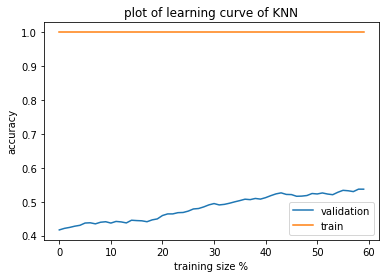

In [39]:
list1=[]
list2=[]
for i in range(20,80):
    clf = KNeighborsClassifier(n_neighbors=1, weights="distance")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list2)),list2,label='validation')
plt.plot(range(len(list1)),list1,label='train')
plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('plot of learning curve of KNN')
plt.legend()
plt.savefig("KNN_wine_2.jpg")
plt.show()

In [40]:
start = time.clock()
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_X,train_y)
test_accuracy = accuracy_score(model.predict(test_X),test_y)
elapsed = (time.clock() - start)
print("knn model accuracy: ",test_accuracy,"time used: ",elapsed)

knn model accuracy:  0.522108843537 time used:  0.00899700000000081
